In [1]:
print("Lecture-18")

Lecture-18


Vektörizaasyon işlemi ile bazı sorunları mevcuttur.

1) Vektörizasyon işleminde sözcüklerin hangi bağlamda kullanıldıklarının bir önemi olmamaktadır. Örneğin "çok kötü" ile "çok güzel" sözcüklerinde "çok" sözcüğünün neyi nitelendirdiği belirlenemeketedir. Yani bu yöntemde yorum yazıları içerisindeki sözcüklerin yerlerini değiştirsek de aslında kestirimde değişen bir şey olmayacaktır. 

2) Geçen örnekte biz yorum yazılarını ikili (binary) bir biçimde eşit uzuluklu vektörlerle ifade ettik. Bir sözcüğün birde nfazla geçmesinin kestirim sürecinde bir etkisi olmayacaktır. 

3) Vektörizasyon işleminde eğitim veri kümesi sözcük haznesi kadar sütundan oluştuğundan dolayı çok büyümektedir. Eğitim sürecini çok yavaşlatmaktadır.

CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(dtype='int8')

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(dtype='int8')

In [3]:
texts = ["bugün hava güzel", "hava sıcaklığı yüksek, çok yüksek", "yeni bir gün", "güzel bir gün", "kötü bir gün", "sıradan bir gün"]

cv.fit(texts)

CountVectorizer(dtype='int8')

In [4]:
cv.vocabulary_

{'bugün': 1,
 'hava': 4,
 'güzel': 3,
 'sıcaklığı': 6,
 'yüksek': 9,
 'çok': 10,
 'yeni': 8,
 'bir': 0,
 'gün': 2,
 'kötü': 5,
 'sıradan': 7}

In [5]:
transformed_result = cv.transform(texts)
print(transformed_result)

  (0, 1)	1
  (0, 3)	1
  (0, 4)	1
  (1, 4)	1
  (1, 6)	1
  (1, 9)	2
  (1, 10)	1
  (2, 0)	1
  (2, 2)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  (3, 3)	1
  (4, 0)	1
  (4, 2)	1
  (4, 5)	1
  (5, 0)	1
  (5, 2)	1
  (5, 7)	1


In [6]:
transformed_result = cv.transform(texts).todense()
print(transformed_result)

[[0 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 2 1]
 [1 0 1 0 0 0 0 0 1 0 0]
 [1 0 1 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 0 0 0]]


In [7]:
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(dtype='int8', binary=True)

dataset_x = cv.fit_transform(df['review']).todense()

import numpy as np

dataset_y = np.zeros(len(df), dtype='int8')
dataset_y[df['sentiment'] == 'positive'] = 1

Model: "IMDB"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 64)                6521344   
                                                                 
 Hidden-2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 6,525,569
Trainable params: 6,525,569
Non-trainable params: 0
_________________________________________________________________
938/938 [==============================] - 98s 95ms/step - loss: 0.3125 - binary_accuracy: 0.8722 - val_loss: 0.2751 - val_binary_accuracy: 0.8901


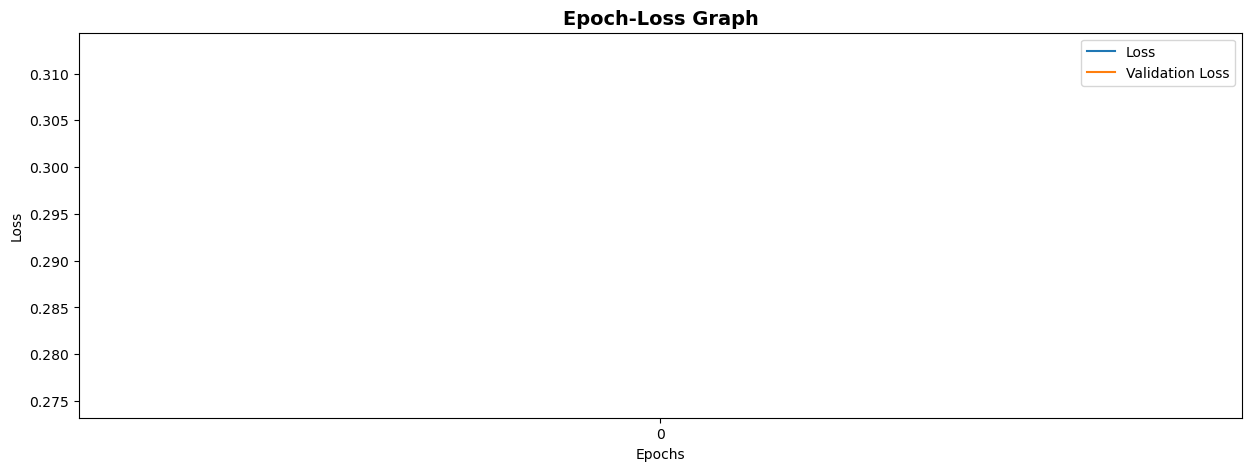

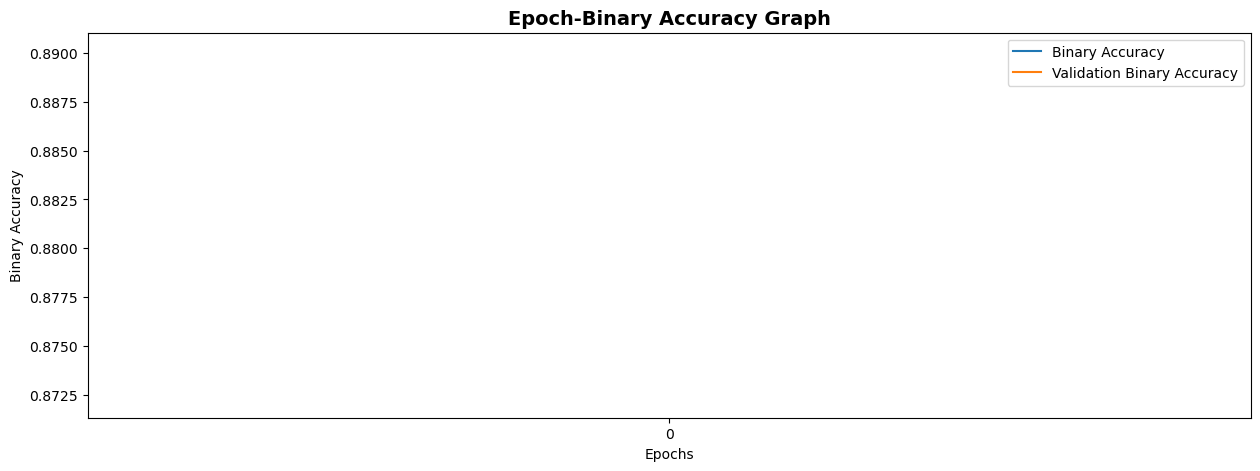

In [9]:
from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='IMDB')
model.add(Dense(64, activation='relu', input_dim=dataset_x.shape[1], name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=1, validation_split=0.2)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(hist.epoch)
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Epoch-Binary Accuracy Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.xticks(hist.epoch)
plt.plot(hist.epoch, hist.history['binary_accuracy'])
plt.plot(hist.epoch, hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

In [10]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
 print(f'{model.metrics_names[i]}: {eval_result[i]}') 

texts = ['the movie was very good. The actors played perfectly. I would recommend it to everyone', 'this movie is awful. The worst film i have ever seen', 'this movie not so good and not so bad. It is average film']
predict_vect = cv.transform(texts)
predict_result = model.predict(predict_vect)

for i in range(len(texts)):
    if predict_result[i, 0] > 0.5:
        print(f'Positive ({predict_result[i, 0]})')
    else:
        print(f'Negative ({predict_result[i, 0]})')

391/391 [==============================] - 13s 33ms/step - loss: 0.2751 - binary_accuracy: 0.8927
loss: 0.27505016326904297
binary_accuracy: 0.8927199840545654
1/1 [==============================] - 2s 2s/step
Positive (0.8136945962905884)
Negative (0.08743837475776672)
Negative (0.3363763391971588)


Keras içerisnde tensorflow.keras.datasets paket içerisinde hazır bir biçimde bazı veri kümeleri bulunduruluyor:
- boston_housing
- cifar10
- cifar100
- fashion_mnist
- imdb
- mnist
- reuters 

### Yazıların Sınıflandırılması: Reuters Örneği

Bir yazı verildiğinde yazının konusunu 46 değişik konu arasından belirleyebilme çalışması için kullanılan bir veri kümesi. Haber yazısından oluşuyor.

category_list = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','moneysupply', 'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [11]:
import numpy as np
from tensorflow.keras.datasets import reuters

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = reuters.load_data()

2110848/2110848 [==============================] - 1s 0us/step


In [18]:
category_list = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','moneysupply', 'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [19]:
word_dict = reuters.get_word_index()
rev_word_dict = {value: key for key, value in word_dict.items()}

550378/550378 [==============================] - 1s 1us/step


In [21]:
rev_word_dict

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [22]:
print_review = lambda review: ' '.join([rev_word_dict[i - 3] for i in review if i > 2 if i > 2])

In [27]:
print_review(training_dataset_x[0])

'mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [37]:
def vectorize(iterable, colsize):
    result = np.zeros((len(iterable), colsize), dtype=np.int8)
    for index, vals in enumerate(iterable):
        result[index, vals] = 1
    
    return result

training_dataset_x = vectorize(training_dataset_x, len(word_dict) + 3)
test_dataset_x = vectorize(test_dataset_x, len(word_dict) + 3)

In [38]:
training_dataset_y = vectorize(training_dataset_y, 46)
test_dataset_y = vectorize(test_dataset_y, 46)

In [42]:
test_dataset_x

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int8)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='Reuters')
model.add(Dense(64, activation='relu', input_dim=len(word_dict) + 3, name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(46, activation='softmax', name='Output'))

model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=5, validation_split=0.2)

Model: "Reuters"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 64)                1982912   
                                                                 
 Hidden-2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 46)                2990      
                                                                 
Total params: 1,990,062
Trainable params: 1,990,062
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
225/225 [==============================] - 12s 45ms/step - loss: 1.5255 - categorical_accuracy: 0.6708 - val_loss: 1.1002 - val_categorical_accuracy: 0.7646
Epoch 2/5
225/225 [==============================] - 12s 56ms/step - loss: 0.7664 - categorical_accuracy: 0.8362 - val_loss: 0.9658 - val_categori

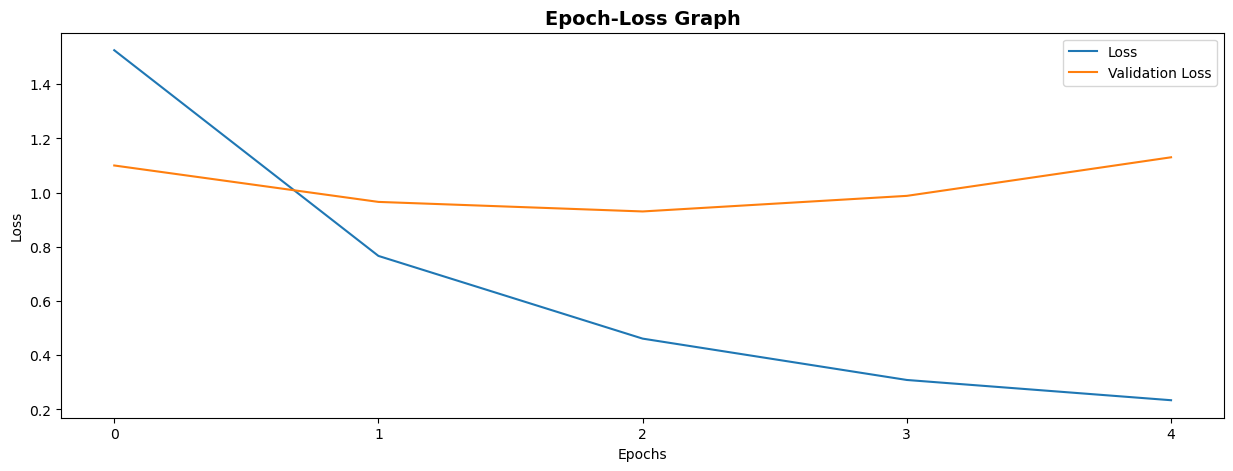

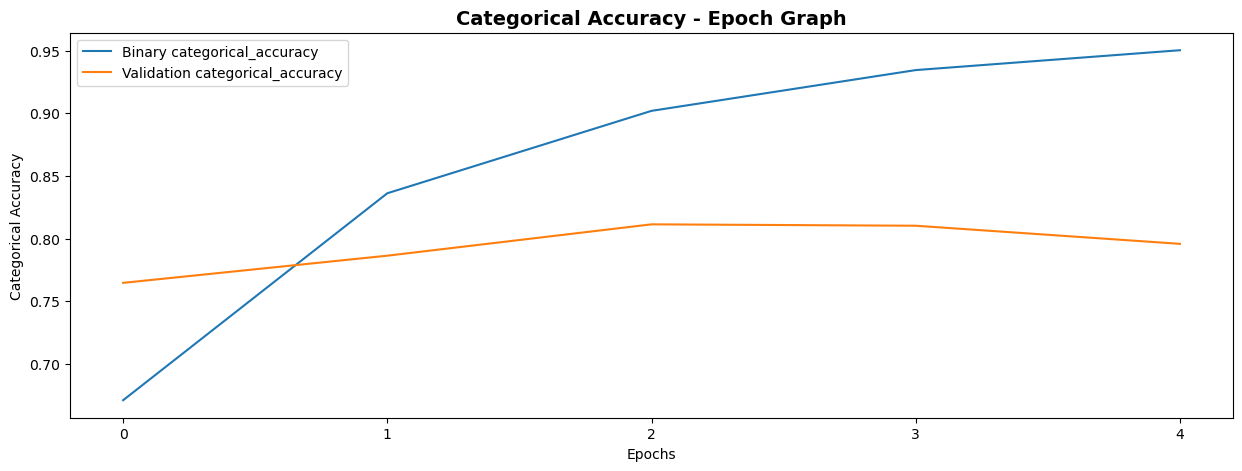

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(hist.epoch)
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Categorical Accuracy - Epoch Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.xticks(hist.epoch)
plt.plot(hist.epoch, hist.history['categorical_accuracy'])
plt.plot(hist.epoch, hist.history['val_categorical_accuracy'])
plt.legend(['Binary categorical_accuracy', 'Validation categorical_accuracy'])
plt.show()

In [45]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

71/71 [==============================] - 3s 39ms/step - loss: 1.2457 - categorical_accuracy: 0.7876
loss: 1.2457302808761597
categorical_accuracy: 0.7876224517822266


In [48]:
texts = ['Coffee is a excellent drink. I drink some coffee every day', 'Trade is very important for countries.']

import regex

def prepare_predict(texts):
    predict_list = []
    for text in texts:
        predict_words = regex.findall("[A-Za-z-0-9'-]+", text.lower())
        predict_list.append([word_dict[word] + 3 for word in predict_words])
    
    return predict_list

predict_list = prepare_predict(texts)
predict_data = vectorize(predict_list, len(word_dict) + 3)

predict_result = model.predict(predict_data)

1/1 [==============================] - 0s 22ms/step


In [51]:
predict_result = np.argmax(predict_result, 1)

In [53]:
for i in predict_result:
    print(category_list[i])

coffee
trade
